# 2.4 探究式问题

## 2.4.1 提出问题

（1）对比不同分类器结果的差异，为什么？

（2）对比同一分类器两次结果的差异，回答为什么？

（3）分类器是什么？（映射函数？分类规则？分类边界？空间剖分？）

（4）如何构建分类器？（知识、学习？）

（5）机器学习的目标是什么？分类器学习学什么？什么是好的分类器？（错误率低、误差小）

## 2.4.2 数据集说明

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Normalized
def Normalized(x):
    minx=np.min(x)
    maxX=np.max(x)
    x=(x-minx)/(maxX-minx)
    return x;
# transform label of class to -1 and 1
def classtransform(x):
    for i in range(0,len(x)):
        if(x[i]>0):
            x[i]=1
        else:
            x[i]=-1
    return x;
# the datasets of two blobs
def makeblods(n):
    np.random.seed(0)
    X,y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=0.8, random_state=2)
    rand_X=255*Normalized(X)
    Y=classtransform(y)
    return rand_X,Y;
# the datasets of two randoms
def makerandoms(n):
    np.random.seed(0)
    X = np.random.rand(n, 2)
    rand_X=255*Normalized(X)
    m=[]
    for i in range(0,n):
        if (rand_X[:,0][i]>128 and rand_X[:,1][i]>128) or (rand_X[:,0][i]<=127 and rand_X[:,1][i]<=127):
            m.append(0)
        else:
            m.append(1)
    Y=classtransform(m)
    return rand_X,Y;
# the datasets of two two circles
def makecircles(n):
    np.random.seed(0)
    X,y = datasets.make_circles(n_samples=n,factor=0.1,noise=0.08,random_state=2)
    rand_X=255*Normalized(X)
    Y=classtransform(y)
    return rand_X,Y;
# the datasets of two two Helix
def makeHelixs(n):
    np.random.seed(0)
    t = 1.2 * np.pi * (0 + 4 * np.random.rand(1, n))
    x0 = -t * np.cos(t); y0 = -t * np.sin(t);
    x2 = t * np.cos(t); x=np.concatenate((x0, x2), axis=1)  #第二条与第一条的坐标相反
    y2 = t * np.sin(t); y=np.concatenate((y0, y2), axis=1)
    X = np.concatenate((x, y))
    X += .2 * np.random.randn(2, 2*n)
    X = X.T
    c1=np.ones(n); c2=np.zeros(n); c3=np.concatenate((c1, c2))
    rand_X=255*Normalized(X)
    Y=classtransform(c3)
    return rand_X,Y;
# Drawing many chart 
def DrawManyChart(X,Y,cm_bright,width,height,titlename,size,Row,Column):
    plt.figure(figsize=(width,height))
    for k in range(0,Row*Column):
        plt.subplot(Row,Column,k+1)
        sct=plt.scatter(X[k][:,0], X[k][:,1], c=Y[k],s=size,cmap=cm_bright)
        plt.title(titlename[k])
    plt.show();

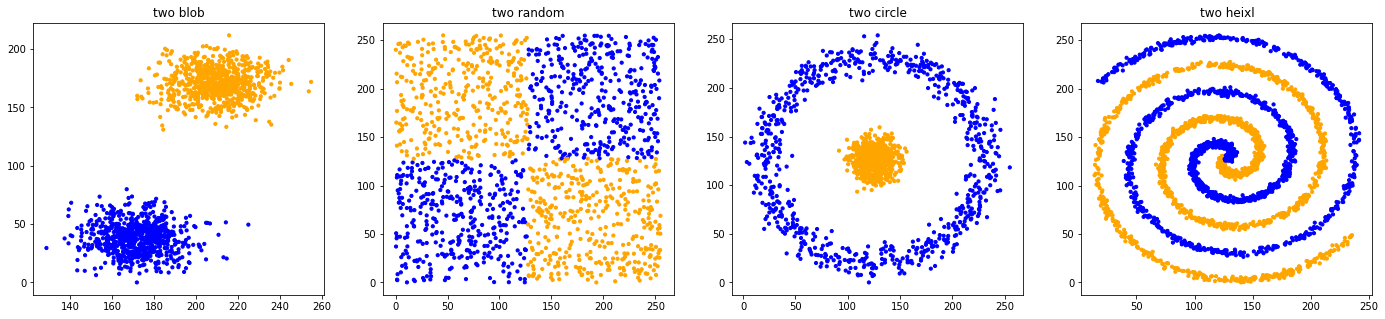

In [2]:
#生成四种数据集
n_samples=1500
XB,yb=makeblods(n_samples)
XR,yr=makerandoms(n_samples)
XC,yc=makecircles(n_samples)
XH,yh=makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS= [yb,yr,yc,yh]
cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
DrawManyChart(XAS,YAS,cor,24,5,titlename,10,1,4)

## 2.4.3 问题探讨

In [3]:
from sklearn.neighbors import KNeighborsClassifier    # K近邻分类器
from sklearn.naive_bayes import GaussianNB            # 朴素贝叶斯分类器
GNBclf = GaussianNB()
KNNclf = KNeighborsClassifier(3) 

def makeGrids():
    x = np.linspace(0,255,256)
    y = np.linspace(0,255,256)
    X,Y = np.meshgrid(x,y)
    Xzip=list(zip(X.flat,Y.flat))
    # Xzip = np.array(Xzip)
    points = [point for point in zip(X.flat,Y.flat)]
    points = np.array(points)
    return Xzip,points;

#离散网格点生成
Xzip,points = makeGrids()
np.random.shuffle(points)
points = np.array(points)

def DrawdiscussChart(X,Y,width,height,titlename,Row,Column):
    plt.figure(figsize=(width,height))
    cor = ListedColormap(['Blue', 'Orange'])
    DataSetsname = ['two blob','two random','two circle','two heixl']
    for k in range(0,4):
        plt.subplot(Row,Column,k+1)
        sct=plt.scatter(XAS[k][:,0], XAS[k][:,1], c=YAS[k],s = 10,cmap=cor)
        plt.title(DataSetsname[k])
    for k in range(4,Row*Column):
        plt.subplot(Row,Column,k+1)
        sct=plt.scatter(X[:,0], X[:,1], c=Y[k-4],s=4,cmap=cor)
        plt.title(titlename[k-4])
    plt.show();

(1) 同种分类器，对不同数据集进行两次分类的分类结果是否有差异？

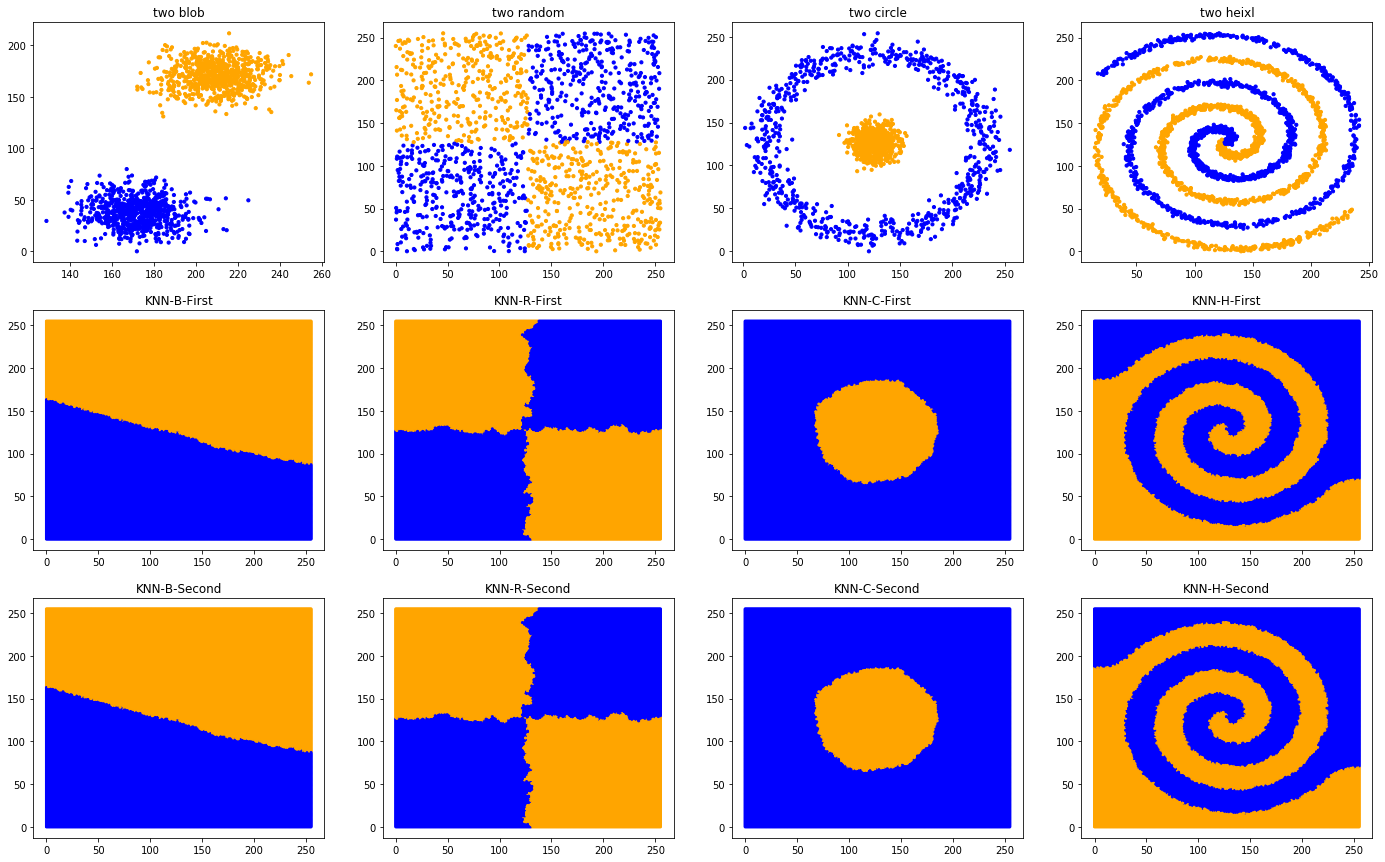

In [4]:
allLabel = []
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnFirst = KNNclf.predict(points)
    allLabel.append(LknnFirst)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    #pointsScond =  np.array(np.random.shuffle(points))
    LknnSecond = KNNclf.predict(points)
    allLabel.append(LknnSecond)

titlename = ['KNN-B-First','KNN-R-First','KNN-C-First','KNN-H-First','KNN-B-Second','KNN-R-Second','KNN-C-Second','KNN-H-Second']    
DrawdiscussChart(points,allLabel,24,15,titlename,3,4)

图中第一行为不同数据集，第二到第三行分别为第一次分类结果和第二次分类结果。<br>
从图中结果可看出同种分类器(k近邻分类器)下，两次分类的结果也并无差异。

(2) 离散化特征空间，当测试点数量增加，分类结果是否有差异？

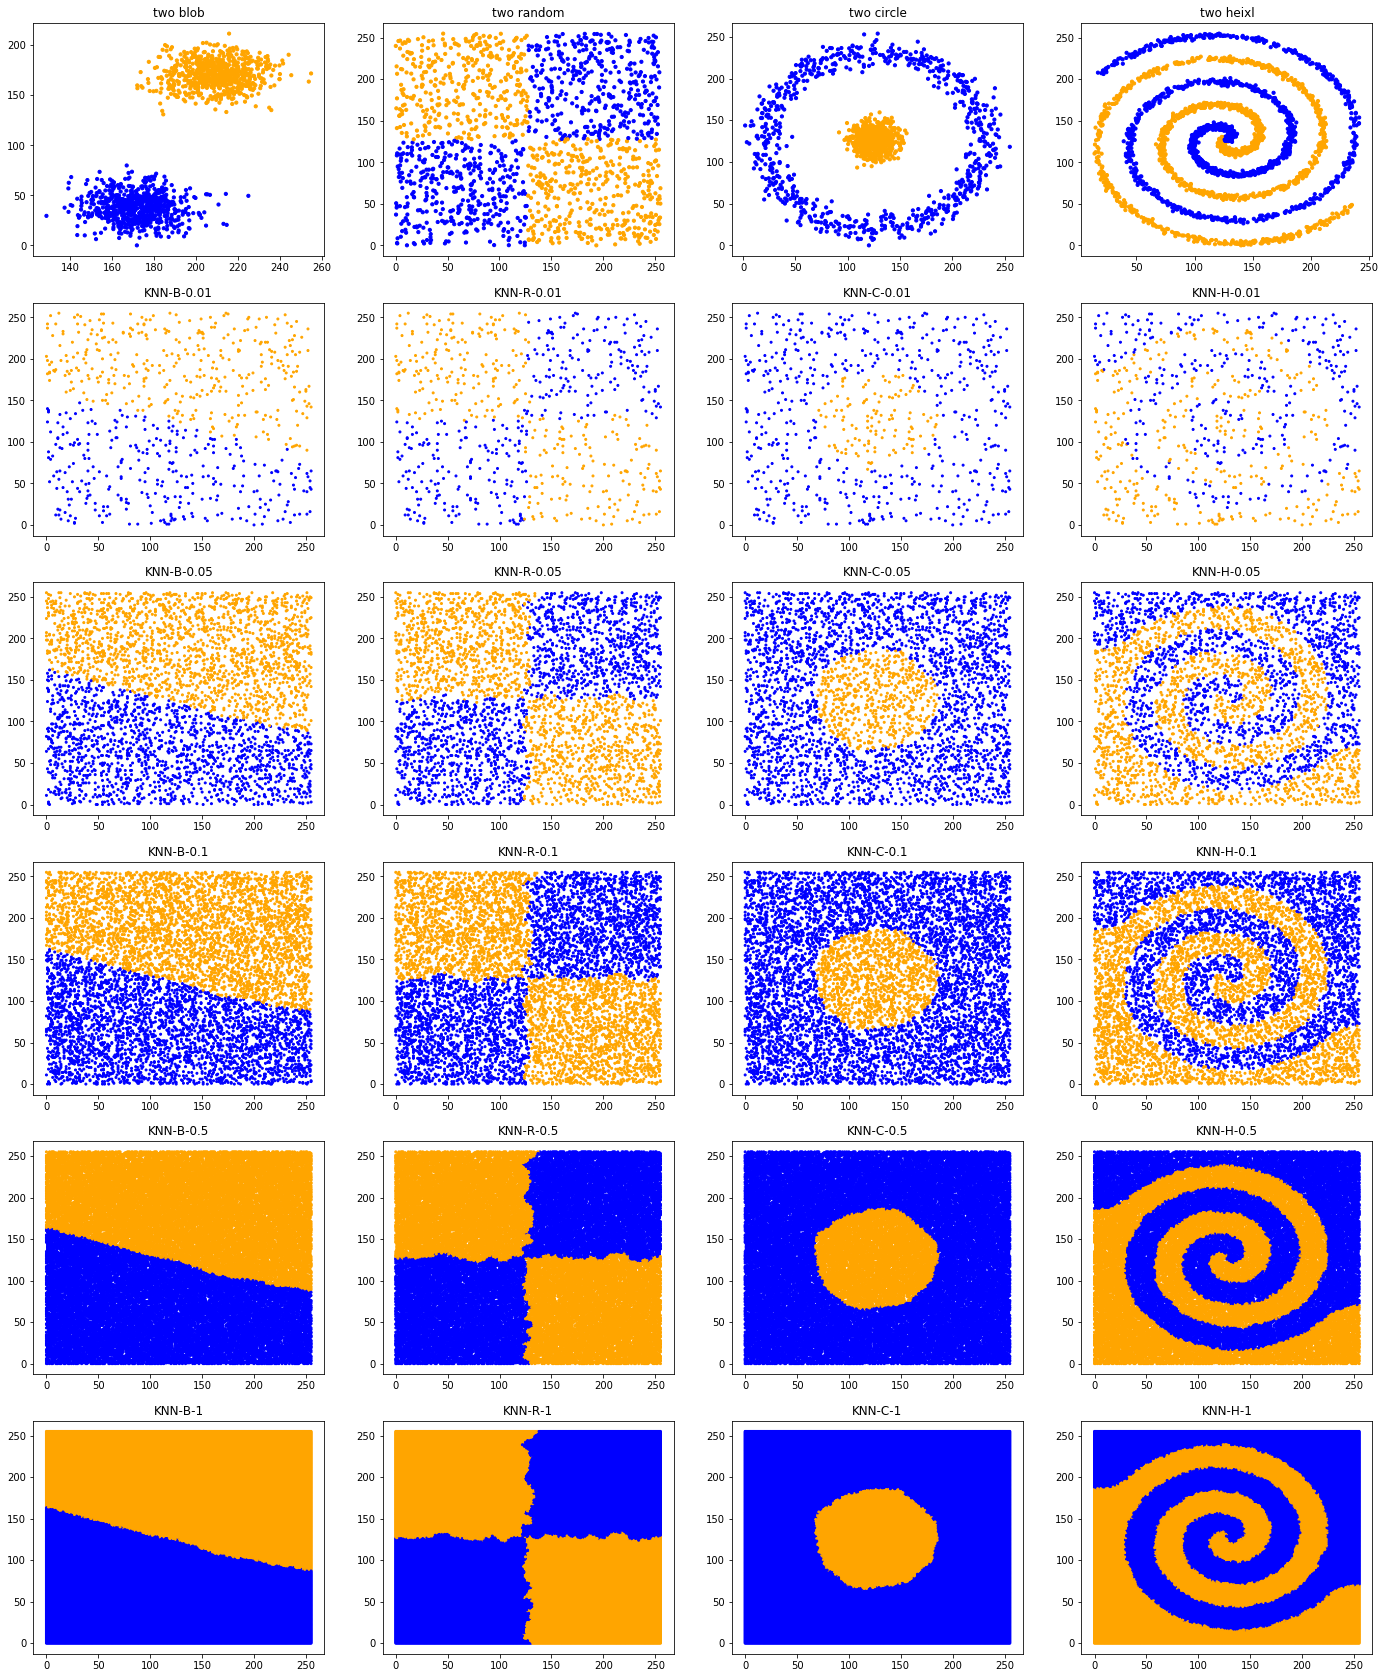

In [5]:
def DrawAddPointsChart(X,Y,width,height,titlename,Row,Column):
    plt.figure(figsize=(width,height))
    cor = ListedColormap(['Blue', 'Orange'])
    DataSetsname = ['two blob','two random','two circle','two heixl']
    for k in range(0,4):
        plt.subplot(Row,Column,k+1)
        sct=plt.scatter(XAS[k][:,0], XAS[k][:,1], c=YAS[k],s = 10,cmap=cor)
        plt.title(DataSetsname[k])
    for k in range(4,Row*Column):
        plt.subplot(Row,Column,k+1)
        sct=plt.scatter(X[k-4][:,0], X[k-4][:,1], c=Y[k-4],s=4,cmap=cor)
        plt.title(titlename[k-4])
    plt.show();

allLabel = [];     L=len(points);
P001 = points[0:int(0.01*L)];     P005 = points[0:int(0.05*L)];
P01 = points[0:int(0.1*L)];       P05 = points[0:int(0.5*L)];       P1 = points[0:int(1*L)];

AllX = [P001,P001,P001,P001,P005,P005,P005,P005,P01,P01,P01,P01,P05,P05,P05,P05,P1,P1,P1,P1]
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnFirst = KNNclf.predict(P001)
    allLabel.append(LknnFirst)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    #pointsScond =  np.array(np.random.shuffle(points))
    LknnSecond = KNNclf.predict(P005)
    allLabel.append(LknnSecond)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnFirst = KNNclf.predict(P01)
    allLabel.append(LknnFirst)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnFirst = KNNclf.predict(P05)
    allLabel.append(LknnFirst)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnFirst = KNNclf.predict(P1)
    allLabel.append(LknnFirst)

titlename = ['KNN-B-0.01','KNN-R-0.01','KNN-C-0.01','KNN-H-0.01','KNN-B-0.05','KNN-R-0.05','KNN-C-0.05','KNN-H-0.05',
            'KNN-B-0.1','KNN-R-0.1','KNN-C-0.1','KNN-H-0.1','KNN-B-0.5','KNN-R-0.5','KNN-C-0.5','KNN-H-0.5',
            'KNN-B-1','KNN-R-1','KNN-C-1','KNN-H-1']    
DrawAddPointsChart(AllX,allLabel,24,30,titlename,6,4)

随机选取离散化特征空间中的每个点（256 * 256个点）进行分类。<br>
图中第一行为不同训练数据集，第二到第六行分别代表从测试占整个特征空间的比例（0.01、0.05、0.1、0.5、1）。<br>
当特征空间中用于测试的点数逐渐增加，可观察到在同种分类方法下（最邻近分类）的分类结果并无差异。

(3) 不同分类器，对不同数据集进行分类的分类结果会有什么样的差异？

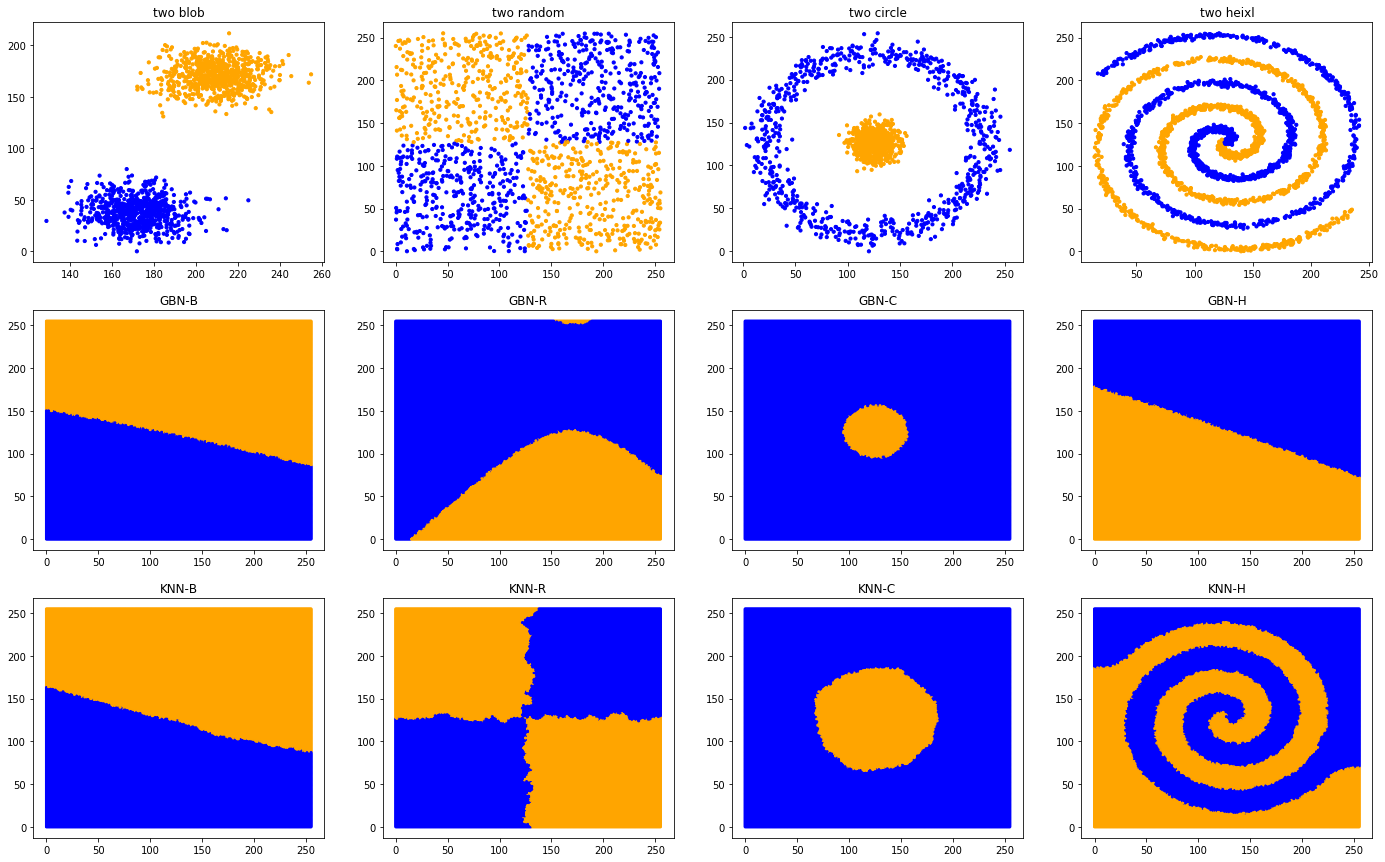

In [7]:
allLabel = []
for ii in range(0,4):
    GNBclf.fit(XAS[ii],YAS[ii])
    LGBNFirst = GNBclf.predict(points)
    allLabel.append(LGBNFirst)
for ii in range(0,4):
    KNNclf.fit(XAS[ii],YAS[ii])
    LknnSecond = KNNclf.predict(points)
    allLabel.append(LknnSecond)
titlename = ['GBN-B','GBN-R','GBN-C','GBN-H','KNN-B','KNN-R','KNN-C','KNN-H']    
DrawdiscussChart(points,allLabel,24,15,titlename,3,4)

图中第一行为不同数据集，第二到第三行分别为不同分类器（高斯朴素贝叶斯，最邻近方法）的分类结果。<br>
从图中结果可看出不同分类器下，特征空间中的分类结果存在明显差异。

(4) 为什么不同分类器，分类结果会有差异？

KNN：记住所有的训练样本，计算每个测试点到每个类别的所有训练点的距离，记录一个最近距离，对应的训练点类别，即是测试点的类别。<br>

GNB：根据训练集来估计类先验概率和每个特征的条件概率，然后利用训练出的模型，计算每个样本点的后验概率，求取最大后验概率，其对应的类别就是测试点的类别。

(5) 分类器是什么？（映射函数？分类规则？分类边界？空间剖分？）

当分类器的类型、参数给定了之后，分类器就是对特征空间的剖分。<br>
同一分类器，测试点数量增加、两次分类的结果都是相同的。

(6) 为什么naive_bayes.GaussianNB在不同数据集分类效果不同？<br>

两类数据集看作两个服从高斯分布的数据集：<br>
当两类数据集的高分分布协方差大致相同，高斯朴素贝叶斯分类边界呈现直线。<br>
当两类数据集的高斯分布协方差不同，此时分类边界会偏向某一类数据集的均值中心。
    
![](Picture/figureGB.png)